In [1]:
import os
from datetime import datetime, timedelta
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import PIL
import librosa
import librosa.display
from sklearn.preprocessing import StandardScaler
import IPython.display as ipd
SEED = 42
np.random.seed(SEED)

# Извлечение признаков
Для начала загрузим и обработаем наши данные

In [2]:
IMAGE_TRAIN_PATH = "./data/train/image"
VOICE_TRAIN_PATH = "./data/train/voice"
IMAGE_TEST_PATH = "./data/test/image"
VOICE_TEST_PATH = "./data/test/voice"

def read_image(path):
    return PIL.Image.open(path).convert('L')

In [3]:
def extract_image_features(image_folder):
    image_vectors = []
    indices = []
    for image_name in os.listdir(image_folder):
        index = os.path.splitext(image_name)[0]
        indices.append(index)
        image = read_image(os.path.join(image_folder, image_name))
        image_vector = np.array(image).reshape(-1)
        image_vectors.append(image_vector)
    return pd.DataFrame({
    'index': indices,
    'image_vector': image_vectors,
})
image_features = extract_image_features(IMAGE_TRAIN_PATH)

При загрузке данных добавим признак "длительность аудиодорожки"

In [4]:
def load_wav(path, sr=8000):
    return librosa.load(path, sr=sr)

def extract_voice_features(voice_folder, numcep=20, hop_length=512):
    voice_vectors = []
    durations = []
    indices = []
    for record_name in os.listdir(voice_folder):
        index = os.path.splitext(record_name)[0]
        indices.append(index)
        signal, sr = load_wav(
            os.path.join(voice_folder, record_name)
        )
        mfcc_features = librosa.feature.mfcc(
            signal, sr=sr, n_mfcc=numcep, hop_length=hop_length
        )
        voice_vector = mfcc_features.mean(axis=1)
        voice_vectors.append(voice_vector)
        durations.append(len(signal) / sr)
    return pd.DataFrame({
        'index': indices,
        'voice_vector': voice_vectors,
        'duration': durations,
    })
    

voice_features = extract_voice_features(VOICE_TRAIN_PATH)

C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1753
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1692
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1997
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1842
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1720
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1785
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for

C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1915
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2005
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1713
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1793
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1560
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1805
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for

C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1357
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1443
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1911
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2020
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1965
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1978
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for

В итоге, до объединения векторов датасет выглядит следующим образом

In [5]:
dataset = image_features.merge(voice_features, on='index')
dataset

,index,image_vector,voice_vector,duration
0,0_0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-206.55408, 57.496918, 18.373892, -15.641151,...",0.494625
1,0_1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-222.50253, 55.383736, 35.916107, -16.092304,...",0.464500
2,0_10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-405.5842, 55.47761, 1.0680052, 23.38893, -22...",0.402125
3,0_100,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-158.2577, 94.51687, -24.176521, -13.719617, ...",0.529625
4,0_101,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-345.32925, 54.180794, -10.09595, 0.4152941, ...",0.392125
...,...,...,...,...
1495,9_95,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-341.91574, 80.74027, -9.73618, -16.225134, -...",0.442875
1496,9_96,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-208.87622, 105.77467, 1.0554518, 3.7066505, ...",0.603375
1497,9_97,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-200.52533, 87.3133, 0.081408605, -19.750954,...",0.517750
1498,9_98,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-351.91977, 76.35029, -19.223038, 0.40502164,...",0.367250


Добавим признак "количество нечёрных пикселей"

In [6]:
dataset["pixel"] = [len(vector[vector > 0]) for vector in dataset.image_vector]
dataset

,index,image_vector,voice_vector,duration,pixel
0,0_0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-206.55408, 57.496918, 18.373892, -15.641151,...",0.494625,188
1,0_1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-222.50253, 55.383736, 35.916107, -16.092304,...",0.464500,240
2,0_10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-405.5842, 55.47761, 1.0680052, 23.38893, -22...",0.402125,201
3,0_100,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-158.2577, 94.51687, -24.176521, -13.719617, ...",0.529625,190
4,0_101,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-345.32925, 54.180794, -10.09595, 0.4152941, ...",0.392125,145
...,...,...,...,...,...
1495,9_95,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-341.91574, 80.74027, -9.73618, -16.225134, -...",0.442875,140
1496,9_96,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-208.87622, 105.77467, 1.0554518, 3.7066505, ...",0.603375,91
1497,9_97,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-200.52533, 87.3133, 0.081408605, -19.750954,...",0.517750,167
1498,9_98,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-351.91977, 76.35029, -19.223038, 0.40502164,...",0.367250,125


Выделим целевую переменную и объединим вектора

In [7]:
target = dataset["index"].apply(lambda x: int(x[0]))
dataset.drop(columns=["index"], inplace=True)
dataset["merged_features"] = dataset.apply(lambda x: np.array(list(x["image_vector"]) + list(x["voice_vector"]) + [x["duration"]] + [x["pixel"]]), axis=1)
dataset.drop(columns=["image_vector", "voice_vector", "duration", "pixel"], inplace=True)
dataset

,merged_features
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
1495,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1496,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1497,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1498,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Преобразуем датасет в матрицу и отмасштабируем все признаки

In [8]:
dataset = np.array(dataset.merged_features)
matrix = np.zeros((len(dataset), len(dataset[0])))
for i in range(len(dataset)):
    matrix[i] = dataset[i]
scaler = StandardScaler()
matrix = scaler.fit_transform(matrix)
matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.64873512,
         0.71305517,  0.86567549],
       [ 0.        ,  0.        ,  0.        , ...,  0.61958984,
         0.48254082,  2.11644309],
       [ 0.        ,  0.        ,  0.        , ..., -0.97313993,
         0.00525177,  1.17836739],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.96627856,
         0.89000601,  0.36055781],
       [ 0.        ,  0.        ,  0.        , ...,  0.50389172,
        -0.26160924, -0.64967755],
       [ 0.        ,  0.        ,  0.        , ...,  0.78046308,
         0.37063136,  0.96188839]])

# Модель

In [9]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

Попробуем поэкспериментировать с моделью

In [10]:
model = StackingClassifier([
                            ("sgd", SGDClassifier(loss="modified_huber", class_weight="balanced")), 
                            ("forest", RandomForestClassifier(n_estimators=500, class_weight="balanced"))
                           ], 
                           final_estimator=GradientBoostingClassifier(n_estimators=500), 
                           passthrough=True, 
                           verbose=1)

In [11]:
%%time
# cross_validate(model, matrix, target, verbose=1, n_jobs=8)
model.fit(matrix, target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.9s finished


Wall time: 2min


StackingClassifier(cv=None,
                   estimators=[('sgd',
                                SGDClassifier(alpha=0.0001, average=False,
                                              class_weight='balanced',
                                              early_stopping=False, epsilon=0.1,
                                              eta0=0.0, fit_intercept=True,
                                              l1_ratio=0.15,
                                              learning_rate='optimal',
                                              loss='modified_huber',
                                              max_iter=1000, n_iter_no_change=5,
                                              n_jobs=None, penalty='l2',
                                              power_t=0.5, random_state=None,
                                              shuffle=True, tol=0.001,
                                              validat...
                                                              max_lea

# Тестовые данные

Проделываем все те же манипуляции с тестовыми данными

In [12]:
image_features_test = extract_image_features(IMAGE_TEST_PATH)
voice_features_test = extract_voice_features(VOICE_TEST_PATH)
dataset_test = image_features_test.merge(voice_features_test, on='index')
dataset_test["index"] = dataset_test["index"].apply(int)
dataset_test.sort_values("index", inplace=True, ignore_index=True)
dataset_test["pixel"] = [len(vector[vector > 0]) for vector in dataset_test.image_vector]
dataset_test

C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1640
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1359
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2034
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2020
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2016
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1650
  n_fft, y.shape[-1]
C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for

,index,image_vector,voice_vector,duration,pixel
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-321.13043, 92.77389, -16.482681, -14.028305,...",0.345000,159
1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-386.0304, 17.297993, 27.163982, -5.6166697, ...",0.459125,93
2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-333.1328, 101.285774, -33.37236, -38.44161, ...",0.344750,81
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-380.00528, 64.79353, 21.97754, 37.15628, -27...",0.275125,142
4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-180.49565, 64.22756, 2.6250513, 0.5299355, -...",0.635500,146
...,...,...,...,...,...
495,495,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-172.89558, 38.383163, 51.74996, -0.557569, -...",0.201250,103
496,496,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-181.85757, 96.01326, 34.25673, -43.075855, -...",0.254500,155
497,497,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-358.65878, 128.14357, -15.016522, -50.288055...",0.342500,161
498,498,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-293.0881, 54.51846, -35.279747, -25.423368, ...",0.389250,151


In [13]:
image_features_test = dataset_test["image_vector"]

In [14]:
dataset_test.drop(columns=["index"], inplace=True)
dataset_test["merged_features"] = dataset_test.apply(lambda x: np.array(list(x["image_vector"]) + list(x["voice_vector"]) + [x["duration"]] + [x["pixel"]]), axis=1)
dataset_test.drop(columns=["image_vector", "voice_vector"], inplace=True)
dataset_test = np.array(dataset_test.merged_features)
matrix_test = np.zeros((len(dataset_test), len(dataset_test[0])))
for i in range(len(dataset_test)):
    matrix_test[i] = dataset_test[i]
matrix_test = scaler.transform(matrix_test)

Делаем предсказание и сохраняем в файл

In [15]:
prediction = model.predict(matrix_test)
ans = pd.DataFrame({"index": list(range(len(matrix_test))), "target": prediction})
ans.to_csv("SmirnovGS.csv", index=False)

В силу специфики задачи, можно посмотреть на каких паттернах мы ошибаемся

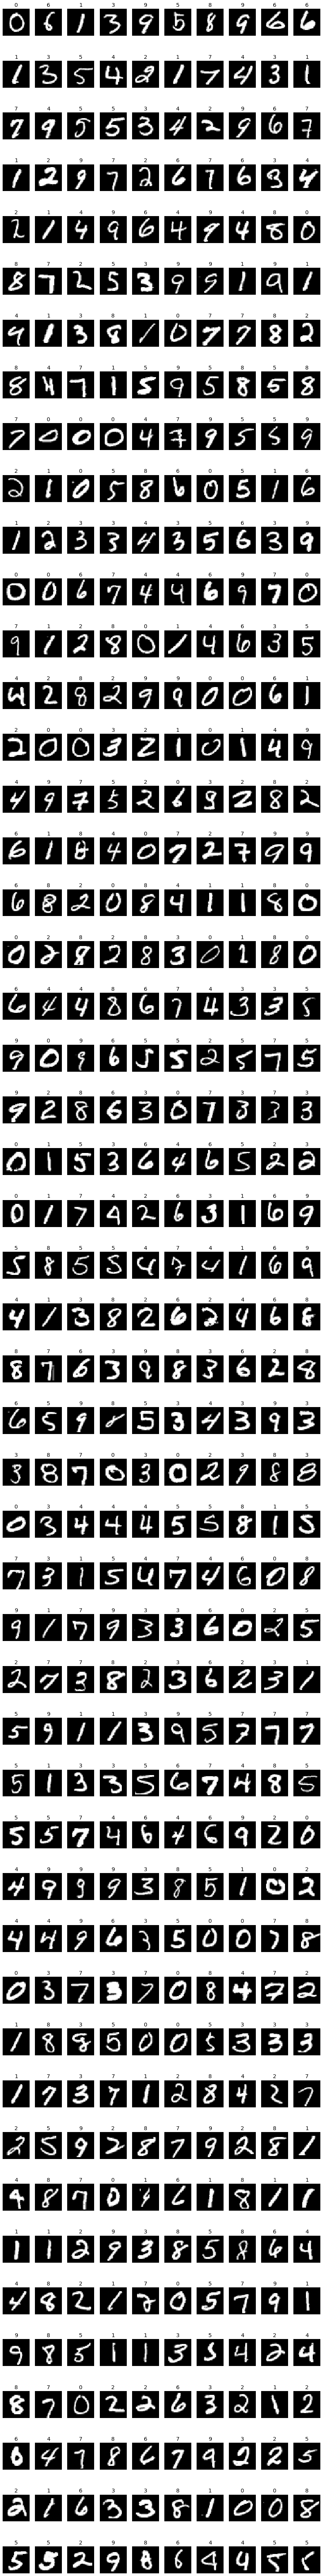

In [16]:
plt.figure(figsize=(15, 125))
for i in range(500):
    plt.subplot(50, 10, i+1)
    plt.imshow(image_features_test[i].reshape((28, 28)), cmap=plt.cm.Greys_r)
    plt.title(prediction[i])
    plt.axis('off')